# PSOSM Assignment 2

## Facebook Graph API

In [36]:
import facebook, json, ast
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
token = "EAAHH6Hycz8oBAIKEDQBDynsfQqQdSx2ORlVr9KnACHNeufxrMqy5uZCZAyjYSoTRFYrH91XQSpCD4WnCtnumOXZACZAis7JuZAiVorCy3ZBPZBgvHZBNTBanRfzsYb1ZA5YjbKe7IlBJ9TuoehWXX53m8DGXZBSNE1MERY7ChQQoeK9c0el3sds32YQG7va5uj3ybsIZAHVjcrrTQZDZD"
version = "2.12"
graph = facebook.GraphAPI(access_token=token, version=version)

### Collecting posts in news feed

It is not possible to collect the news feed of a user since an application requires the `user_posts` permission from the user. For the application to request such permission, it first needs to be approved from the Facebook development team. Since I do not have such approval from the Facebook team, I skipped this question.

However, if I did have approval, the Python code would be as follows:-
```python
news_feed = graph.request("/me/home")
```

Reference: [Facebook documentation](https://developers.facebook.com/docs/facebook-login/permissions/#reference-user_posts)

### Collecting posts in timeline

In [72]:
# Using ast to remove unicode characters, found this neat hack online
timeline = ast.literal_eval(json.dumps(graph.request("/me/feed")))

### Finding reactions of a post

In [73]:
def getReactions(post_id):
    reacts = graph.request("/" + post_id + "?fields=reactions.type(LOVE).limit(0).summary(total_count).as(reactions_love),reactions.type(WOW).limit(0).summary(total_count).as(reactions_wow),reactions.type(HAHA).limit(0).summary(total_count).as(reactions_haha),reactions.type(LIKE).limit(0).summary(total_count).as(reactions_like),reactions.type(ANGRY).limit(0).summary(total_count).as(reactions_angry),reactions.type(SAD).limit(0).summary(total_count).as(reactions_sad)")
    reacts = ast.literal_eval(json.dumps(reacts))
    return reacts

In [74]:
timeline_reacts = []
for post in timeline['data']:
    post_reactions = getReactions(post['id'])
    if 'message' in post:
        post_reactions['words'] = len(post['message'].split())
    else:
        post_reactions['words'] = 0
    timeline_reacts.append(post_reactions)

In [88]:
# the indices represent number of words, values represent number of reacts
histogram_reactions = [0] * 50
histogram_like = [0] * 50
histogram_love = [0] * 50
histogram_sad = [0] * 50
histogram_angry = [0] * 50
histogram_haha = [0] * 50
histogram_wow = [0] * 50

In [89]:
for react_data in timeline_reacts:
    histogram_like[react_data['words']] += react_data['reactions_like']['summary']['total_count']
    histogram_sad[react_data['words']] += react_data['reactions_sad']['summary']['total_count']
    histogram_angry[react_data['words']] += react_data['reactions_angry']['summary']['total_count']
    histogram_wow[react_data['words']] += react_data['reactions_wow']['summary']['total_count']
    histogram_haha[react_data['words']] += react_data['reactions_haha']['summary']['total_count']
    histogram_love[react_data['words']] += react_data['reactions_love']['summary']['total_count']

In [90]:
temp_list = [histogram_like, histogram_love, histogram_sad, histogram_angry, histogram_haha, histogram_wow]
histogram_reactions = [sum(x) for x in zip(*temp_list)]

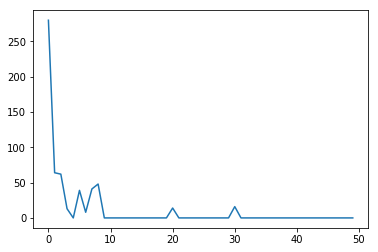

In [91]:
plt.plot(histogram_reactions)

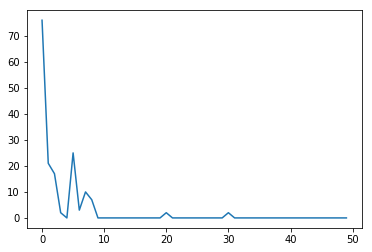

In [92]:
plt.plot(histogram_like)

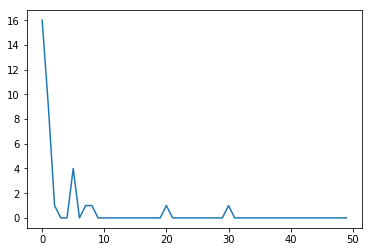

In [93]:
plt.plot(histogram_angry)

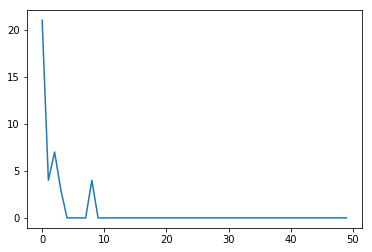

In [94]:
plt.plot(histogram_sad)

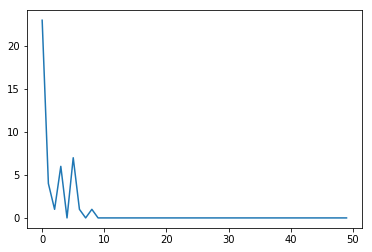

In [95]:
plt.plot(histogram_love)

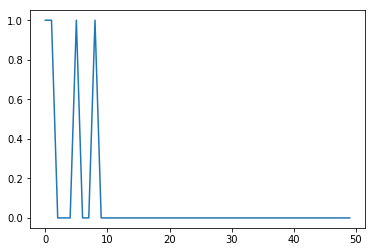

In [96]:
plt.plot(histogram_wow)

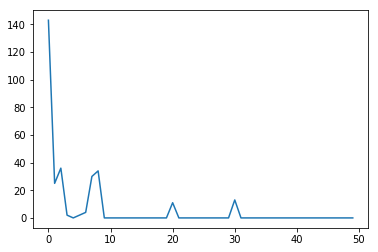

In [97]:
plt.plot(histogram_haha)